In [105]:
import pandas as pd
import os

We will now collect all the results into one dataframe to easily compare the strategies.

In [106]:
df = pd.DataFrame()

for result in os.listdir("./result"):
    result = 'result/' + result
    temp = pd.read_csv(result)
    df = pd.concat([df, temp])

# Best strategies

To evaluate our strategy we will use Van's System Quality Number (SQN) which is one of the many indicators designed to assist traders in determining the strengths, desirability, quality etc of a trading system. The idea behind SQN is to use it to find good quality strategies. And a good quality strategy is seen as one that is both tradable (is it easy, or is it difficult to trade) and efficient (does it make good money when a money management strategy is applied).

The following values suggest the following “qualities” :

* 1.6 - 1.9 Below average
* 2.0 - 2.4 Average
* 2.5 - 2.9 Good
* 3.0 - 5.0 Excellent
* 5.1 - 6.9 Superb
* 7.0 - Holy Grail

The formula : 
* SquareRoot(NumberTrades) * Average(TradesProfit) / StdDev(TradesProfit)

The sqn value should be deemed reliable when the number of trades **>= 30**

Therefore we will remove all line with a total trades less than 30.

In [107]:
df_result = df.loc[(df['Total win'] + df['Total loss']) >= 30]

And then sort the dataframe according their rank.

In [108]:
df = df_result.sort_values('SQN', ascending=False)
df['Rank'] = df['SQN'].rank(method='min', ascending=False)

## Binance historical data (08/17/2017 - 12/25/2020)

In [109]:
topSQN = df.head(10)

topSqnSqn = list(topSQN['SQN'])
topSqnProfit = list(round(topSQN['%'],3))
topSqnWin = list(topSQN['Total win'])
topSqnLoss = list(topSQN['Total loss'])
index = list(topSQN['Rank'])

topSQN

,Pair,Timeframe,Start,End,Strategy,Period,Final value,%,Total win,Total loss,SQN,Rank
1,ETHUSDT,6h,2017-01-01,2020-12-31,SMA,11,14874.364,48.824,122,243,3.05,1.0
2,BTCUSDT,8h,2017-01-01,2020-12-31,SMA,12,13813.646,38.188,83,178,2.89,2.0
2,ETHUSDT,6h,2017-01-01,2020-12-31,SMA,12,14564.124,45.720,113,249,2.88,3.0
1,BTCUSDT,12h,2017-01-01,2020-12-31,SMA,11,13937.049,39.309,56,112,2.87,4.0
0,ETHUSDT,6h,2017-01-01,2020-12-31,SMA,10,14330.644,43.384,129,265,2.82,5.0
3,BTCUSDT,6h,2017-01-01,2020-12-31,SMA,13,13745.854,37.239,96,240,2.82,5.0
0,BTCUSDT,12h,2017-01-01,2020-12-31,SMA,10,13747.955,37.419,59,117,2.81,7.0
2,BTCUSDT,12h,2017-01-01,2020-12-31,SMA,12,14021.213,40.150,52,110,2.79,8.0
12,BTCUSDT,8h,2017-01-01,2020-12-31,SMA,22,14099.781,41.051,49,116,2.75,9.0
8,BTCUSDT,4h,2017-01-01,2020-12-31,SMA,18,13649.596,36.320,111,310,2.75,9.0


In our top 10 best strategies return we have 1 excellent System Quality Number, all the rests are good. 

We have mainly BTCUSDT pair traded however, the only 3 strategy in that top10 that traded ETHUSDT are listed in the top 5 best sqn (and even top 1 with an excellent sqn > 3).

Surprisingly, our SMA strategy succedeed far better than our RSI. This might be explained by the fact that the RSI has taken less than 30 positions on "high" dataframe (> 4h). The few positions taken are not even sucessfull for the majority :

In [110]:
tfhigh_rsi = df.loc[(df['Strategy'] == 'RSI') & ((df['Timeframe'] == '6h') | (df['Timeframe'] == '8h') | (df['Timeframe'] == '12h') | (df['Timeframe'] == '1w'))]

tfhigh_rsi

,Pair,Timeframe,Start,End,Strategy,Period,Final value,%,Total win,Total loss,SQN,Rank
2,BTCUSDT,6h,2017-01-01,2020-12-31,RSI,12,10325.354,3.254,22,9,0.40,507.0
1,BTCUSDT,6h,2017-01-01,2020-12-31,RSI,11,9857.332,-1.427,23,10,-0.18,584.0
0,ETHUSDT,6h,2017-01-01,2020-12-31,RSI,10,9315.605,-6.844,21,13,-0.63,668.0
0,BTCUSDT,6h,2017-01-01,2020-12-31,RSI,10,9469.514,-5.305,23,12,-0.70,683.0


Back to our top 10, we notice that we have many values of period near 10 which means we might have unfortunately missed some good strategy using period < 10. This is something to take into account next time we run our code.

We can also notice that a better sqn doesn't necessary mean better profit as the next charts can illustrates :

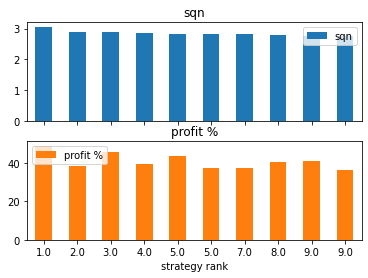

In [111]:
topSqnBars = pd.DataFrame({'sqn': topSqnSqn, 'profit %': topSqnProfit}, index=index)
topSqnBars.index.name = 'strategy rank'
topSqnBarsSplit = topSqnBars.plot.bar(rot=0, subplots=True)
topSqnBarsSplit[1].legend(loc=2);

What's interesting is to see that all our top strategies made at least 2x more negatives trades than positives, nevertheless the final results remains positive. This mean we have a good ratio per trade, in other words for 1 winning trade we can expect to lose *x* times before having a final outcome of 0 since our one profit was either too big, or our losses too small.

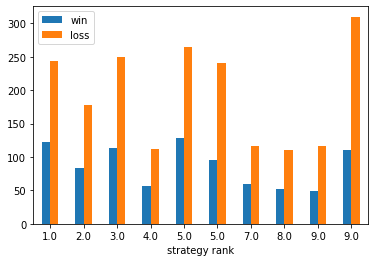

In [101]:
topSqnBars2 = pd.DataFrame({'win': topSqnWin, 'loss': topSqnLoss}, index=index)
topSqnBars2.index.name = 'strategy rank'
topSqnBars2.plot.bar(rot=0);

This really good ratio per trade may be the result of the bullrun that occured in 2017 and end November/start of December 2020 which might have results in big gains. 

This assumptions can be backed with the fact that all our top strategies were applied to our historical data that includes the bullrun period (08/17/2017 - 12/25/2020).

Let's see and compare with what we will get if we remove the bullrun period.

## No bullrun phase (03/01/2018 - 11/15/2020)

In [114]:
nobullrun = df_result.loc[df['Start'] == '2018-03-01']
nobullrun

NameError: name 'dfresults' is not defined

In [47]:
df.loc[df['Start'] == '2018-03-01'].sort_values('SQN', ascending=False).head(10)

,Pair,Timeframe,Start,End,Strategy,Period,Final value,%,Total win,Total loss,SQN
0,BTCUSDT,1w,2018-03-01,2020-11-15,RSI,10,11519.086,15.191,2,0,3.08
1,BTCUSDT,1w,2018-03-01,2020-11-15,RSI,11,11637.561,16.376,2,0,2.84
7,ETHUSDT,4h,2018-03-01,2020-11-15,SMA,17,12711.644,27.116,95,250,2.42
5,ETHUSDT,4h,2018-03-01,2020-11-15,SMA,15,12618.773,26.188,100,270,2.38
1,ETHUSDT,6h,2018-03-01,2020-11-15,SMA,11,12579.214,25.792,91,207,2.35
8,ETHUSDT,4h,2018-03-01,2020-11-15,SMA,18,12569.414,25.694,86,254,2.22
2,ETHUSDT,6h,2018-03-01,2020-11-15,SMA,12,12387.524,23.875,87,209,2.21
4,ETHUSDT,4h,2018-03-01,2020-11-15,SMA,14,12407.632,24.076,103,300,2.20
6,ETHUSDT,4h,2018-03-01,2020-11-15,SMA,16,12434.159,24.342,98,266,2.19
0,ETHUSDT,6h,2018-03-01,2020-11-15,SMA,10,12397.067,23.971,97,224,2.18


Top 10 SQN

Top 10 Profit

In [46]:
df.sort_values('%', ascending=False).head(10)

,Pair,Timeframe,Start,End,Strategy,Period,Final value,%,Total win,Total loss,SQN
1,ETHUSDT,6h,2017-01-01,2020-12-31,SMA,11,14874.364,48.824,122,243,3.05
3,BTCUSDT,12h,2017-01-01,2020-12-31,SMA,13,14773.328,47.351,47,108,2.25
19,BTCUSDT,6h,2017-01-01,2020-12-31,SMA,29,14672.107,46.487,48,140,2.28
2,ETHUSDT,6h,2017-01-01,2020-12-31,SMA,12,14564.124,45.720,113,249,2.88
0,ETHUSDT,8h,2017-01-01,2020-12-31,SMA,10,14565.665,45.648,95,198,2.62
0,ETHUSDT,3d,2017-01-01,2020-12-31,SMA,10,15467.598,44.964,12,14,1.80
20,BTCUSDT,6h,2017-01-01,2020-12-31,SMA,30,14517.592,44.944,48,144,2.21
19,ETHUSDT,1d,2017-01-01,2020-12-31,SMA,29,14491.179,44.625,14,34,1.71
18,BTCUSDT,6h,2017-01-01,2020-12-31,SMA,28,14471.304,44.482,50,149,2.18
5,BTCUSDT,12h,2017-01-01,2020-12-31,SMA,15,14812.219,44.266,42,95,2.27
